In [ ]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
n_epochs = 20
learning_rate = 0.2

random_seed = 42
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [ ]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=
                               torchvision.transforms.ToTensor()),
  batch_size=64, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=
                               torchvision.transforms.ToTensor()),
  batch_size=1000, shuffle=True)

In [ ]:
class net(nn.Module):
    def __init__(self):
        super(net, self).__init__()
        self.fc1 = nn.Linear(784, 50)
        self.fc2 = nn.Linear(50, 10)


    def forward(self, x):
        x = x.view(-1, 784)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.softmax(x, dim = 1)

In [ ]:
network = net()
optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=0.5)

In [ ]:
train_counter = []
weight_value = []

In [ ]:
def train(epoch):
  network.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    #forward propogation
    output = network(data)
    #loss calculation and backpropogation
    loss = F.cross_entropy(output, target)
    loss.backward()
    #optimizer update
    optimizer.step()
    #logs how many instances are processed, and one weight layer
    if batch_idx % 10 == 0:
      weight_value.append(network.fc2.weight[0].tolist())
      train_counter.append((batch_idx*64) + (epoch*len(train_loader.dataset)))

In [ ]:
from sklearn.metrics import accuracy_score
def test():
  network.eval()
  acc = []
  with torch.no_grad():
    for data, target in test_loader:
      #forward propogation
      output = network(data)
      #comparison between ground truth and predicted values
      preds = torch.argmax(output, 1)
      acc.append(accuracy_score(preds.tolist(), target.tolist()))
  print('Testing Accuracy:', np.array(acc).mean())

In [ ]:
for epoch in range(0, n_epochs):
  train(epoch)
  test()

Testing Accuracy: 0.9043000000000001
Testing Accuracy: 0.9232000000000001
Testing Accuracy: 0.9306000000000001
Testing Accuracy: 0.9333000000000002
Testing Accuracy: 0.9337
Testing Accuracy: 0.9389
Testing Accuracy: 0.942
Testing Accuracy: 0.9436
Testing Accuracy: 0.9394
Testing Accuracy: 0.9444999999999999
Testing Accuracy: 0.9451
Testing Accuracy: 0.944
Testing Accuracy: 0.9465999999999999
Testing Accuracy: 0.9465999999999999
Testing Accuracy: 0.9468
Testing Accuracy: 0.9491999999999999
Testing Accuracy: 0.9514999999999999
Testing Accuracy: 0.9492
Testing Accuracy: 0.9496
Testing Accuracy: 0.9490999999999998


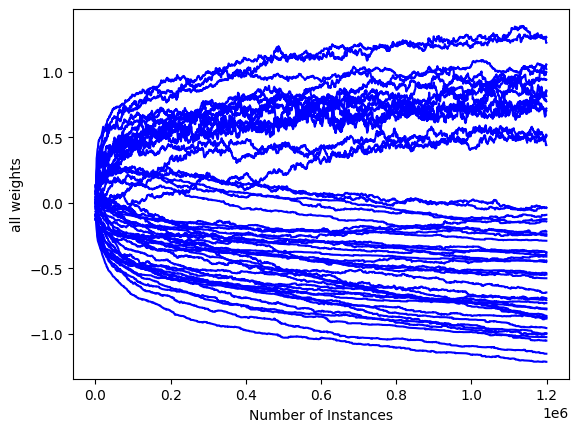

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.xlabel("Number of Instances")
plt.ylabel("all weights")
plt.plot(train_counter, weight_value, color='blue')
plt.show()

In [ ]:
weights = np.array(weight_value)
print(weights.shape)
w1 = np.array(weight_value)[:, 20]
grad_w1 = np.diff(w1) * (1 / learning_rate)

(1880, 50)


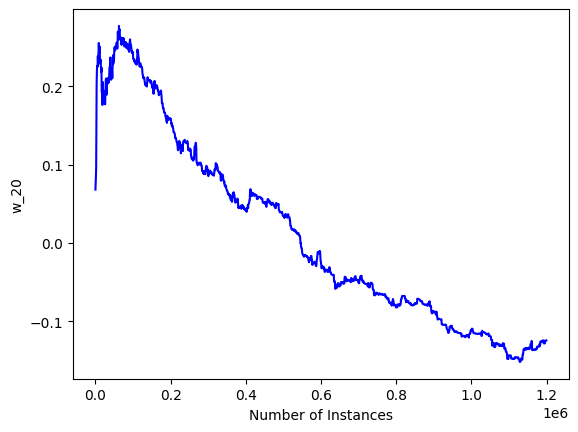

In [ ]:
plt.plot(train_counter, w1, color='blue')
plt.xlabel("Number of Instances")
plt.ylabel("w_20")
plt.show()

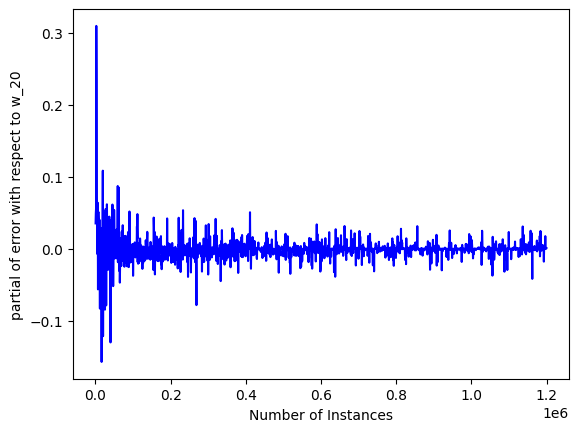

In [ ]:
plt.plot(train_counter[1:], grad_w1, color='blue')
plt.xlabel("Number of Instances")
plt.ylabel("partial of error with respect to w_20")
plt.show()